### Data Wrangling

In [1]:
import pandas as pd
import numpy as np

el_universal = pd.read_csv("24_web_scrapper/elpais_2020_04_05_articles.csv") #La forma mas facil de leet .CSV
pd.options.display.max_rows = 10 #Maximas rows a mostrar

In [2]:
# 1. Añadir newspaper_uid al DataFrame

el_universal["newspaper_uid"] = "eluniversal"

el_universal

,body,title,url,newspaper_uid
0,Maravillas Delgado.Incluso para los más ardien...,El fracaso épico de la Administración Trump,https://www.elpais.com/economia/negocio/2020-0...,eluniversal
1,"El miércoles pasado, unos vecinos de Vitoria s...",La línea invisible de ETA,https://www.elpais.com/television/2020-04-03/l...,eluniversal
2,Ai Weiwei es uno de los disidentes chinos que ...,Ai Weiwei: “El capitalismo ha llegado a su fin”,https://www.elpais.com/ideas/2020-04-04/ai-wei...,eluniversal
3,América concentra el 40% de la pandemia mundia...,Coronavirus en América: últimas noticias del C...,https://www.elpais.com/america/sociedad/2020-0...,eluniversal
4,"De izquierda a derecha, Manuel Barragán, Sara ...",Cuando se pierde la vida por curar a los demás,https://www.elpais.com/sociedad/2020-04-05/cua...,eluniversal
...,...,...,...,...
51,\nEl número de muertos con coronavirus en Fran...,"Últimas noticias del coronavirus, en directo |...",https://www.elpais.com/sociedad/2020-04-05/ult...,eluniversal
52,A estas alturas anda en un obligado receso de ...,"José Luis Perales, alfarería, vino y una admir...",https://www.elpais.com/gente/2020-04-04/jose-l...,eluniversal
53,"A las 7.30, con el termómetro a dos grados y l...",Un Ejército para exterminar el coronavirus,https://www.elpais.com/espana/2020-04-04/un-ej...,eluniversal
54,"El presidente de Estados Unidos, Donald Trump,...",Trump despide a otra figura clave en su ‘impea...,https://www.elpais.com/internacional/2020-04-0...,eluniversal


In [3]:
# 2. Obtener el host

from urllib.parse import urlparse

el_universal["host"] = el_universal["url"].apply(lambda url:urlparse(url).netloc)

el_universal

,body,title,url,newspaper_uid,host
0,Maravillas Delgado.Incluso para los más ardien...,El fracaso épico de la Administración Trump,https://www.elpais.com/economia/negocio/2020-0...,eluniversal,www.elpais.com
1,"El miércoles pasado, unos vecinos de Vitoria s...",La línea invisible de ETA,https://www.elpais.com/television/2020-04-03/l...,eluniversal,www.elpais.com
2,Ai Weiwei es uno de los disidentes chinos que ...,Ai Weiwei: “El capitalismo ha llegado a su fin”,https://www.elpais.com/ideas/2020-04-04/ai-wei...,eluniversal,www.elpais.com
3,América concentra el 40% de la pandemia mundia...,Coronavirus en América: últimas noticias del C...,https://www.elpais.com/america/sociedad/2020-0...,eluniversal,www.elpais.com
4,"De izquierda a derecha, Manuel Barragán, Sara ...",Cuando se pierde la vida por curar a los demás,https://www.elpais.com/sociedad/2020-04-05/cua...,eluniversal,www.elpais.com
...,...,...,...,...,...
51,\nEl número de muertos con coronavirus en Fran...,"Últimas noticias del coronavirus, en directo |...",https://www.elpais.com/sociedad/2020-04-05/ult...,eluniversal,www.elpais.com
52,A estas alturas anda en un obligado receso de ...,"José Luis Perales, alfarería, vino y una admir...",https://www.elpais.com/gente/2020-04-04/jose-l...,eluniversal,www.elpais.com
53,"A las 7.30, con el termómetro a dos grados y l...",Un Ejército para exterminar el coronavirus,https://www.elpais.com/espana/2020-04-04/un-ej...,eluniversal,www.elpais.com
54,"El presidente de Estados Unidos, Donald Trump,...",Trump despide a otra figura clave en su ‘impea...,https://www.elpais.com/internacional/2020-04-0...,eluniversal,www.elpais.com


In [4]:
#3. Contar valores repetido

el_universal["host"].value_counts()

www.elpais.com        53
english.elpais.com     3
Name: host, dtype: int64

## Missing Data

In [5]:
# 4. Rellenar datos faltantes

missing_titles_mask = el_universal["title"].notna()

(el_universal[missing_titles_mask]["url"]
 .str.extract(r'(?P<missing_titles>[^/]+)$')
 .applymap(lambda title: title.split("-"))
 .applymap(lambda title_word_list: " ".join(title_word_list))
)

,missing_titles
0,el fracaso epico de la administracion trump.html
1,la linea invisible de eta.html
2,ai weiwei el capitalismo ha llegado a su fin.html
3,coronavirus en america ultimas noticias del co...
4,cuando se pierde la vida por curar a los demas...
...,...
51,ultima hora y noticias del coronavirus en dire...
52,jose luis perales alfareria vino y una admirac...
53,un ejercito para exterminar el coronavirus.html
54,trump despide a otra figura clave en su impeac...


## Additional cleanup

In [6]:
# 5. añadir uid a las filas

import hashlib

uids = (el_universal
            .apply(lambda row: hashlib.md5(bytes(row['url'].encode())) , axis=1)
            .apply(lambda hash_object: hash_object.hexdigest())

        )

el_universal['uid'] = uids
el_universal.set_index('uid', inplace=True)

el_universal


,body,title,url,newspaper_uid,host
uid,,,,,
4d1a0d1e768bbd5e576175953baed922,Maravillas Delgado.Incluso para los más ardien...,El fracaso épico de la Administración Trump,https://www.elpais.com/economia/negocio/2020-0...,eluniversal,www.elpais.com
9502e25ca6fdad16bb40abce2a318b6d,"El miércoles pasado, unos vecinos de Vitoria s...",La línea invisible de ETA,https://www.elpais.com/television/2020-04-03/l...,eluniversal,www.elpais.com
bea0f56a787b591fd426645882a223b0,Ai Weiwei es uno de los disidentes chinos que ...,Ai Weiwei: “El capitalismo ha llegado a su fin”,https://www.elpais.com/ideas/2020-04-04/ai-wei...,eluniversal,www.elpais.com
7bc3d4e768dce22feb9a2f1f0be39218,América concentra el 40% de la pandemia mundia...,Coronavirus en América: últimas noticias del C...,https://www.elpais.com/america/sociedad/2020-0...,eluniversal,www.elpais.com
e30b6c806f1582c8d8c0c1b94e762475,"De izquierda a derecha, Manuel Barragán, Sara ...",Cuando se pierde la vida por curar a los demás,https://www.elpais.com/sociedad/2020-04-05/cua...,eluniversal,www.elpais.com
...,...,...,...,...,...
d10f5bb79666adec842aadcf557f14c2,\nEl número de muertos con coronavirus en Fran...,"Últimas noticias del coronavirus, en directo |...",https://www.elpais.com/sociedad/2020-04-05/ult...,eluniversal,www.elpais.com
74d9f5dd9ba43d2653f769f812de2207,A estas alturas anda en un obligado receso de ...,"José Luis Perales, alfarería, vino y una admir...",https://www.elpais.com/gente/2020-04-04/jose-l...,eluniversal,www.elpais.com
f9c3288ca78903121abdf75350372da2,"A las 7.30, con el termómetro a dos grados y l...",Un Ejército para exterminar el coronavirus,https://www.elpais.com/espana/2020-04-04/un-ej...,eluniversal,www.elpais.com


In [7]:
stripped_body = (el_universal
                    .apply(lambda row: row['body'], axis = 1)
                    .apply(lambda body: list(body))
                    .apply(lambda letters: list(map(lambda letter: letter.replace('\n', ''), letters)))
                    .apply(lambda letters: ''.join(letters))
                            )

stripped_body

uid
4d1a0d1e768bbd5e576175953baed922    Maravillas Delgado.Incluso para los más ardien...
9502e25ca6fdad16bb40abce2a318b6d    El miércoles pasado, unos vecinos de Vitoria s...
bea0f56a787b591fd426645882a223b0    Ai Weiwei es uno de los disidentes chinos que ...
7bc3d4e768dce22feb9a2f1f0be39218    América concentra el 40% de la pandemia mundia...
e30b6c806f1582c8d8c0c1b94e762475    De izquierda a derecha, Manuel Barragán, Sara ...
                                                          ...                        
d10f5bb79666adec842aadcf557f14c2    El número de muertos con coronavirus en Franci...
74d9f5dd9ba43d2653f769f812de2207    A estas alturas anda en un obligado receso de ...
f9c3288ca78903121abdf75350372da2    A las 7.30, con el termómetro a dos grados y l...
d97b32c038d3497f4a95ccc917407fed    El presidente de Estados Unidos, Donald Trump,...
12008110a178a09c4414e6fe7b0adcf9    Isabel II de Inglaterra acude a la misa en hon...
Length: 56, dtype: object

## Data enrichment

In [8]:
# 6 tokenizar el titulo y el body

import nltk
from nltk.corpus import stopwords

# nltk.download('punkt')
# nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

def tokenise_column(df, column_name):
    return (df
                .dropna()
                .apply(lambda row: nltk.word_tokenize(row[column_name]), axis=1)
                .apply(lambda tokens: list(filter(lambda token: token.isalpha(), tokens)))
                .apply(lambda tokens: list(map(lambda token: token.lower(), tokens)))
                .apply(lambda word_list: list(filter(lambda word: word not in stop_words, word_list)))
                .apply(lambda valid_word_list: len(valid_word_list))
                
           
           )

el_universal['n_tokens_title'] = tokenise_column(el_universal, 'body')
el_universal

,body,title,url,newspaper_uid,host,n_tokens_title
uid,,,,,,
4d1a0d1e768bbd5e576175953baed922,Maravillas Delgado.Incluso para los más ardien...,El fracaso épico de la Administración Trump,https://www.elpais.com/economia/negocio/2020-0...,eluniversal,www.elpais.com,38
9502e25ca6fdad16bb40abce2a318b6d,"El miércoles pasado, unos vecinos de Vitoria s...",La línea invisible de ETA,https://www.elpais.com/television/2020-04-03/l...,eluniversal,www.elpais.com,511
bea0f56a787b591fd426645882a223b0,Ai Weiwei es uno de los disidentes chinos que ...,Ai Weiwei: “El capitalismo ha llegado a su fin”,https://www.elpais.com/ideas/2020-04-04/ai-wei...,eluniversal,www.elpais.com,55
7bc3d4e768dce22feb9a2f1f0be39218,América concentra el 40% de la pandemia mundia...,Coronavirus en América: últimas noticias del C...,https://www.elpais.com/america/sociedad/2020-0...,eluniversal,www.elpais.com,5469
e30b6c806f1582c8d8c0c1b94e762475,"De izquierda a derecha, Manuel Barragán, Sara ...",Cuando se pierde la vida por curar a los demás,https://www.elpais.com/sociedad/2020-04-05/cua...,eluniversal,www.elpais.com,950
...,...,...,...,...,...,...
d10f5bb79666adec842aadcf557f14c2,\nEl número de muertos con coronavirus en Fran...,"Últimas noticias del coronavirus, en directo |...",https://www.elpais.com/sociedad/2020-04-05/ult...,eluniversal,www.elpais.com,4910
74d9f5dd9ba43d2653f769f812de2207,A estas alturas anda en un obligado receso de ...,"José Luis Perales, alfarería, vino y una admir...",https://www.elpais.com/gente/2020-04-04/jose-l...,eluniversal,www.elpais.com,480
f9c3288ca78903121abdf75350372da2,"A las 7.30, con el termómetro a dos grados y l...",Un Ejército para exterminar el coronavirus,https://www.elpais.com/espana/2020-04-04/un-ej...,eluniversal,www.elpais.com,570


## Removing Duplicated Values

In [9]:
# 8. Eliminar duplicados

el_universal['title'].value_counts()

El fracaso épico de la Administración Trump                                                               1
La línea invisible de ETA                                                                                 1
Uruguay avanza en la fabricación de sus propios test de coronavirus                                       1
Ya nadie canta en Garibaldi                                                                               1
La música cubana, de luto por Aute                                                                        1
                                                                                                         ..
Cesta punta, el último deporte que cierra en Estados Unidos                                               1
Francia investiga como acto terrorista un ataque con cuchillo que ha causado dos muertos                  1
Pedro Almodóvar realizará una exposición para la apertura del futuro Museo de la Academia de Hollywood    1
Entender (por fin) ‘Twin Pea

In [10]:
el_universal.drop_duplicates(subset=['title'], keep='first', inplace = True)

## Final Table

In [26]:
# Tabla Final

el_universal
el_universal.to_csv("clean_eluniversal.csv")

## Descriptive analysis

In [27]:
clean_eluniversal = pd.read_csv("clean_eluniversal.csv")

In [28]:
clean_eluniversal.describe()

,n_tokens_title
count,56.000000
mean,691.732143
std,959.950898
min,38.000000
25%,300.500000
50%,465.000000
75%,621.250000
max,5469.000000


In [29]:
clean_eluniversal.loc[clean_elpais["n_tokens_title"] == 0]

,uid,body,title,url,newspaper_uid,host,n_tokens_title


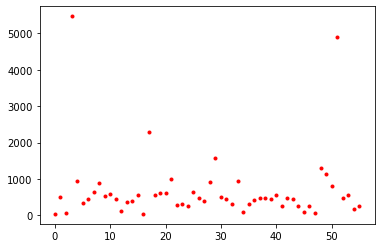

In [43]:
clean_eluniversal["n_tokens_title"].plot(style = "r.")
grouped = clean_eluniversal.groupby("newspaper_uid")

newspaper_uid
eluniversal    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

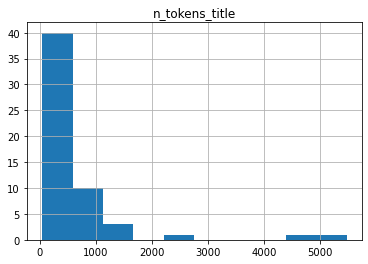

In [44]:
grouped.hist()

In [46]:
grouped["n_tokens_title"].agg(["min", "mean", "max"])

,min,mean,max
newspaper_uid,,,
eluniversal,38,691.732143,5469


newspaper_uid
eluniversal    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

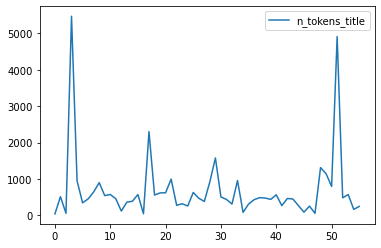

In [47]:
grouped.plot()